In [8]:
import os
import pandas as pd
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import warnings
from scipy.stats import pearson3, genextreme, genpareto
import scipy.special
from datetime import datetime, timedelta


In [9]:
path = r'C:\Users\mmlewis5\OneDrive - The University of Alabama\NOAA Project'
os.chdir(path)

In [10]:
#data import
df1 = pd.read_csv('FishRiver.txt', sep='\t', header=None)
df1 = df1.rename(columns={0: 'Month', 1: 'Day', 2: 'Year', 3: 'Flow (m^3/s)'})
df1['Flow (m^3/s)'] = df1['Flow (m^3/s)'] * 0.0283168
df1

,Month,Day,Year,Flow (m^3/s)
0,7,1,1953,2.831680
1,7,2,1953,2.406928
2,7,3,1953,2.067126
3,7,4,1953,1.868909
4,7,5,1953,1.783958
...,...,...,...,...
19134,1,14,2022,2.188889
19135,1,15,2022,2.271007
19136,1,16,2022,6.739398
19137,1,17,2022,4.417421


In [11]:
#date format
df1['Date']=df1.apply(lambda x:'%s-%s-%s' % (x['Month'],x['Day'],x['Year']),axis=1)
df1['Date']=df1.apply(lambda x:'%s-%s-%s' % (x['Month'],x['Day'],x['Year']),axis=1)
df1

,Month,Day,Year,Flow (m^3/s),Date
0,7,1,1953,2.831680,7-1-1953
1,7,2,1953,2.406928,7-2-1953
2,7,3,1953,2.067126,7-3-1953
3,7,4,1953,1.868909,7-4-1953
4,7,5,1953,1.783958,7-5-1953
...,...,...,...,...,...
19134,1,14,2022,2.188889,1-14-2022
19135,1,15,2022,2.271007,1-15-2022
19136,1,16,2022,6.739398,1-16-2022
19137,1,17,2022,4.417421,1-17-2022


In [12]:
#date format
df1.Date = pd.to_datetime(df1.Date)
df1

,Month,Day,Year,Flow (m^3/s),Date
0,7,1,1953,2.831680,1953-07-01
1,7,2,1953,2.406928,1953-07-02
2,7,3,1953,2.067126,1953-07-03
3,7,4,1953,1.868909,1953-07-04
4,7,5,1953,1.783958,1953-07-05
...,...,...,...,...,...
19134,1,14,2022,2.188889,2022-01-14
19135,1,15,2022,2.271007,2022-01-15
19136,1,16,2022,6.739398,2022-01-16
19137,1,17,2022,4.417421,2022-01-17


In [13]:
#annual max
df2 = df1.loc[df1.groupby('Year')['Flow (m^3/s)'].idxmax()]
df2

,Month,Day,Year,Flow (m^3/s),Date
158,12,6,1953,131.106784,1953-12-06
184,1,1,1954,5.380192,1954-01-01
762,8,2,1955,12.289491,1955-08-02
985,3,12,1956,22.115421,1956-03-12
1374,4,5,1957,95.144448,1957-04-05
1710,3,7,1958,32.564320,1958-03-07
2265,9,13,1959,41.908864,1959-09-13
2468,4,3,1960,34.829664,1960-04-03
2842,4,12,1961,68.809824,1961-04-12
3111,1,6,1962,14.724736,1962-01-06


In [14]:
from matplotlib.markers import MarkerStyle
import datetime

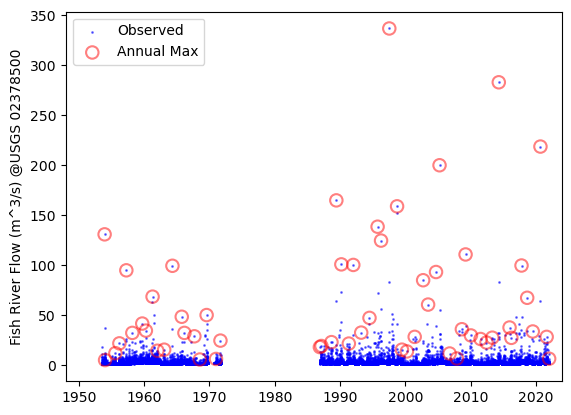

In [15]:
#max discharge scatter plot
fig, ax = plt.subplots()
plt.scatter(df1['Date'], df1['Flow (m^3/s)'], alpha=0.5, s = 1, color = 'b', label='Observed')
plt.scatter(df2['Date'], df2['Flow (m^3/s)'], alpha=0.5, s = 80, color = 'r', marker = MarkerStyle('o', fillstyle='none'), label='Annual Max')
ax.set_ylabel('Fish River Flow (m^3/s) @USGS 02378500')
ax.set_xlim([datetime.date(1948, 1, 1), datetime.date(2023, 12, 31)])
ax.legend(loc='upper left')
resolution_value = 1200
plt.savefig("FishRiverAnnualMax.png", format="png", dpi=resolution_value)
plt.show()

In [16]:
#historical period split
y = 1987
df3 = df1[df1['Year'] <= y]
df3.index = pd.to_datetime(df3['Date'])
del df3['Month']
del df3['Day']
del df3['Year']
del df3['Date']
ts1 = df3.squeeze()
ts1

Date
1953-07-01    2.831680
1953-07-02    2.406928
1953-07-03    2.067126
1953-07-04    1.868909
1953-07-05    1.783958
                ...   
1987-12-27    2.350294
1987-12-28    3.681184
1987-12-29    2.888314
1987-12-30    2.435245
1987-12-31    2.350294
Name: Flow (m^3/s), Length: 6705, dtype: float64

In [17]:
#present period split
y = 1987
df4 = df1[df1['Year'] > y]
df4.index = pd.to_datetime(df4['Date'])
del df4['Month']
del df4['Day']
del df4['Year']
del df4['Date']
ts2 = df4.squeeze()
ts2

Date
1988-01-01    2.859997
1988-01-02    3.992669
1988-01-03    3.284749
1988-01-04    2.973264
1988-01-05    2.576829
                ...   
2022-01-14    2.188889
2022-01-15    2.271007
2022-01-16    6.739398
2022-01-17    4.417421
2022-01-18    2.916630
Name: Flow (m^3/s), Length: 12434, dtype: float64

In [18]:
#cleaning dataframe
y = 1994
df5 = df2[df2['Year'] <= y]
df5.index = pd.to_datetime(df5['Date'])
df6 = df2[df2['Year'] > y]
df6.index = pd.to_datetime(df6['Date'])
del df5['Month']
del df5['Day']
del df5['Year']
del df5['Date']
del df6['Month']
del df6['Day']
del df6['Year']
del df6['Date']

In [19]:
stats.kstest(df5['Flow (m^3/s)'], df6['Flow (m^3/s)'])

KstestResult(statistic=0.21428571428571427, pvalue=0.549366998032041)

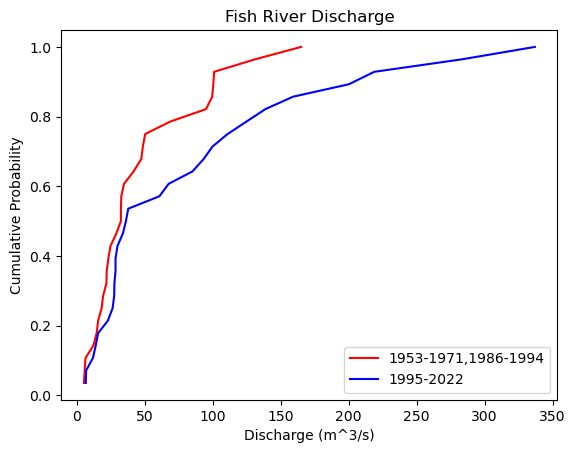

In [20]:
# Calculate CDF for df5
df5 = df5.sort_values('Flow (m^3/s)')
df5['cumulative_probability'] = np.arange(start=1, stop=len(df5)+1) / len(df5)

# Calculate CDF for df6
df6 = df6.sort_values('Flow (m^3/s)')
df6['cumulative_probability'] = np.arange(start=1, stop=len(df6)+1) / len(df6)


plt.plot(df5['Flow (m^3/s)'], df5['cumulative_probability'], label='1953-1971,1986-1994', c='r')
plt.plot(df6['Flow (m^3/s)'], df6['cumulative_probability'], label='1995-2022', c='b')

plt.title('Fish River Discharge')
plt.xlabel ('Discharge (m^3/s)')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best')

plt.show()



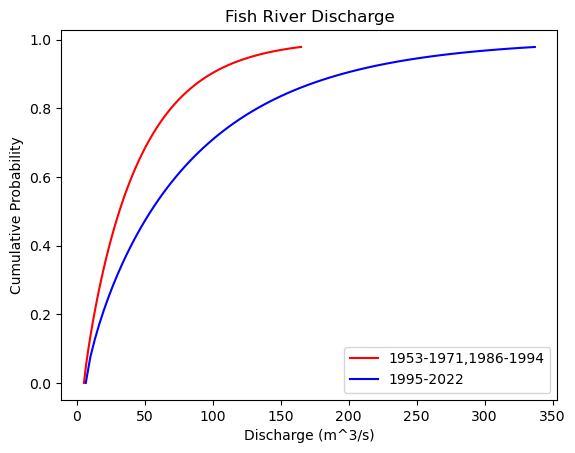

In [21]:
#fitted cdfs
# Sort the data
df5 = df5.sort_values('Flow (m^3/s)')
df6 = df6.sort_values('Flow (m^3/s)')

# Fit pearson3 distribution to df5
shape5, loc5, scale5 = pearson3.fit(df5['Flow (m^3/s)'])

# Fit pearson3 distribution to df6
shape6, loc6, scale6 = pearson3.fit(df6['Flow (m^3/s)'])

# Generate points for the theoretical CDF based on the fitted gamma distribution
x5 = np.linspace(df5['Flow (m^3/s)'].min(), df5['Flow (m^3/s)'].max(), 100)
y5 = pearson3.cdf(x5, shape5, loc5, scale5)

x6 = np.linspace(df6['Flow (m^3/s)'].min(), df6['Flow (m^3/s)'].max(), 100)
y6 = pearson3.cdf(x6, shape6, loc6, scale6)

# Plot the theoretical CDF based on the fitted gamma distribution
plt.plot(x5, y5, label='1953-1971,1986-1994', c='r')
plt.plot(x6, y6, label='1995-2022', c='b')

plt.title('Fish River Discharge')
plt.xlabel ('Discharge (m^3/s)')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best')
plt.savefig(f"C:/Users/mmlewis5.STUDENT/OneDrive - The University of Alabama/Desktop/NOAA Images/FishRiverCDF.png", dpi=300)
plt.show()

In [22]:
#historical parameters
param = pearson3.fit(df5['Flow (m^3/s)'].values)
print(param)

(2.1204878069694955, 44.83111879550971, 41.82760462176225)


In [23]:
#kstest historical with fit
stats.kstest(df5['Flow (m^3/s)'], 'pearson3', args=(param[0], param[1], param[2]))

KstestResult(statistic=0.1051718415448929, pvalue=0.884416321518202)

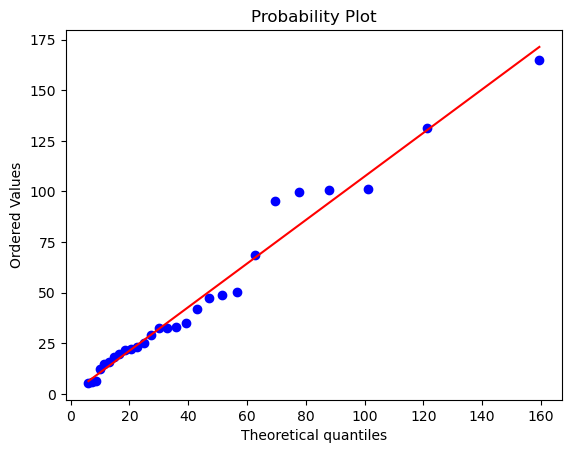

In [24]:
#probability plot
scipy.stats.probplot(df5['Flow (m^3/s)'], sparams=(param[0], param[1], param[2]), dist=scipy.stats.pearson3, plot=plt)
plt.show()

In [25]:
#present parameters
param = pearson3.fit(df6['Flow (m^3/s)'].values)
print(param)

(2.260926813902839, 83.89582831517066, 87.22252063011226)


In [26]:
#present kstest with fit
stats.kstest(df6['Flow (m^3/s)'], 'pearson3', args=(param[0], param[1], param[2]))

KstestResult(statistic=0.15238212694837444, pvalue=0.4870178437647418)

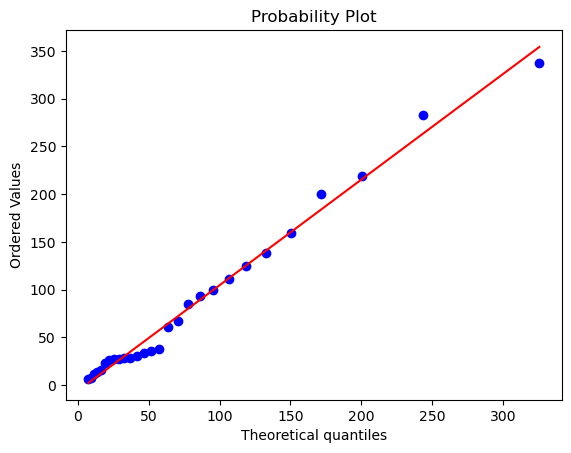

In [27]:
#present probability plot
scipy.stats.probplot(df6['Flow (m^3/s)'], sparams=(param[0], param[1], param[2]), dist=scipy.stats.pearson3, plot=plt)
plt.show()

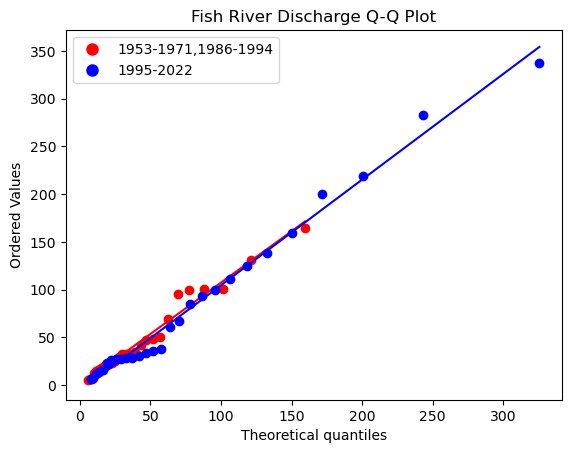

In [28]:
#combined historic and present Q-Q Plot 
fig = plt.figure()
ax = fig.add_subplot()
scipy.stats.probplot(df5['Flow (m^3/s)'], sparams=(2.120487777506547, 44.831119290363105, 41.82760456525723), dist=scipy.stats.pearson3, plot=plt)
res = scipy.stats.probplot(df6['Flow (m^3/s)'], sparams=(2.260926813902839, 83.89582831517066, 87.22252063011226), dist=scipy.stats.pearson3, plot=plt)
ax.set_title('Fish River Discharge Q-Q Plot')
lines = ax.get_lines()

# Set properties for first dataset (red)
lines[0].set_markerfacecolor('r')
lines[0].set_markeredgecolor('r')
lines[1].set_color('r')

# Set properties for second dataset (blue)
lines[2].set_markerfacecolor('b')
lines[2].set_markeredgecolor('b')
lines[3].set_color('b')
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='1953-1971,1986-1994'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='1995-2022')]


ax.legend(handles=legend_elements)
plt.savefig(f"C:/Users/mmlewis5.STUDENT/OneDrive - The University of Alabama/Desktop/Images/FishRiverPP.png", dpi=300)
plt.show()